In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Remove the common warnings due to deprecated options:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # For logistic regression modeling.
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.isnull().any().any()

True

<Axes: >

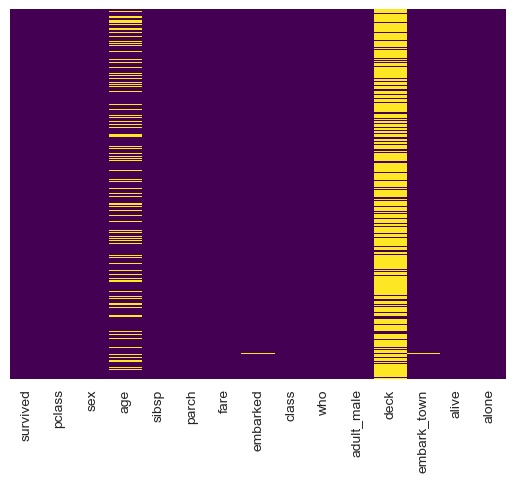

In [7]:
# Visually checking for null values in the data frame:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

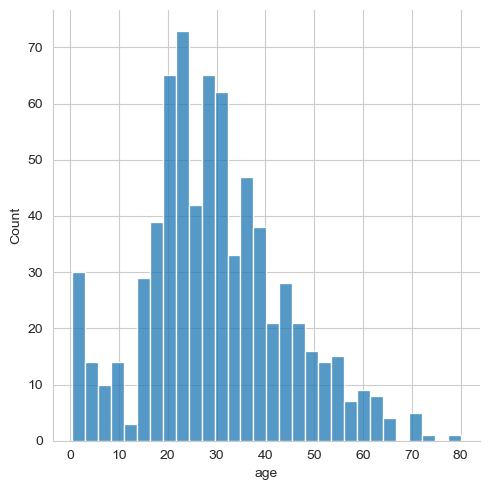

In [8]:
# Checking the age distribution of the values that are known:
sns.displot(titanic['age'].dropna(),kde=False,bins=30)

<Axes: xlabel='sibsp', ylabel='count'>

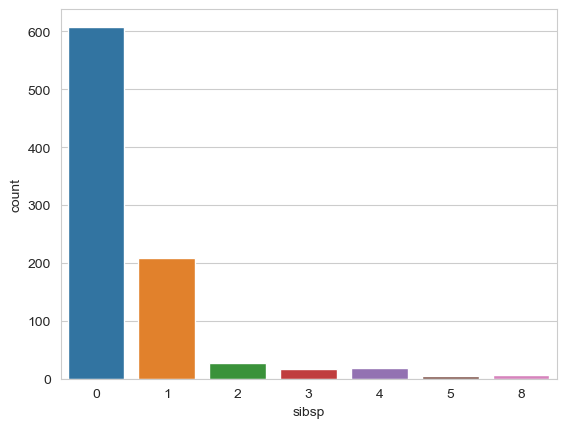

In [9]:
# Checking for the sibling/spouse distribution in the data:
sns.countplot(x='sibsp',data=titanic)

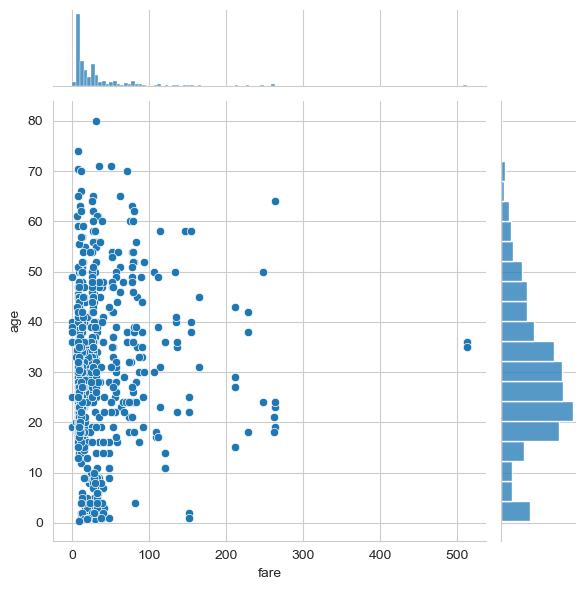

In [10]:
# Checking to see if there's any statistical relation between fare and age:
sns.jointplot(x='fare',y='age',data=titanic)

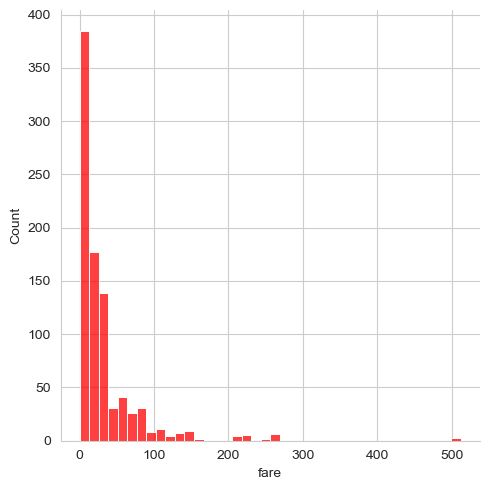

In [11]:
# Checking the fare distribution in the data set:
sns.displot(titanic['fare'],kde=False,color='r',bins=40)

<Axes: xlabel='class', ylabel='age'>

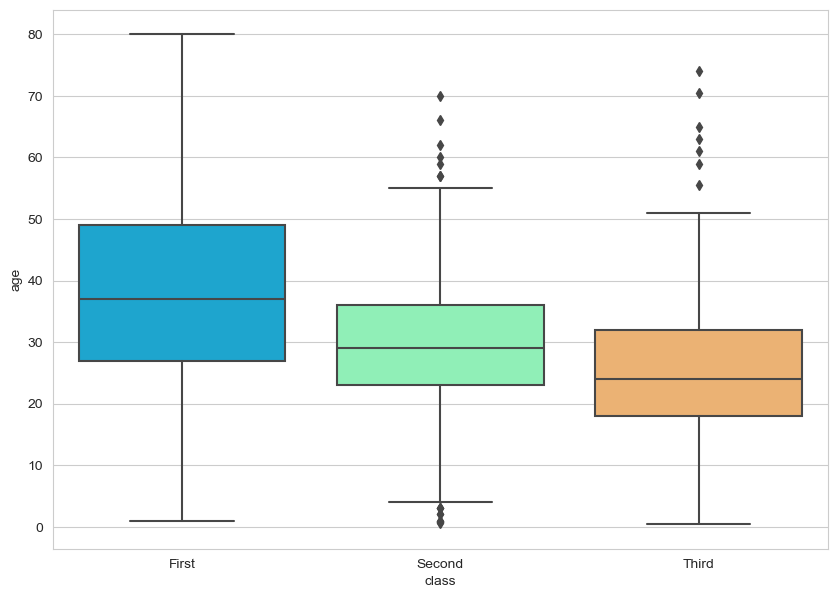

In [12]:
# Understanding a rough trend of age by class:
plt.figure(figsize=(10,7))
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

<Axes: xlabel='class', ylabel='age'>

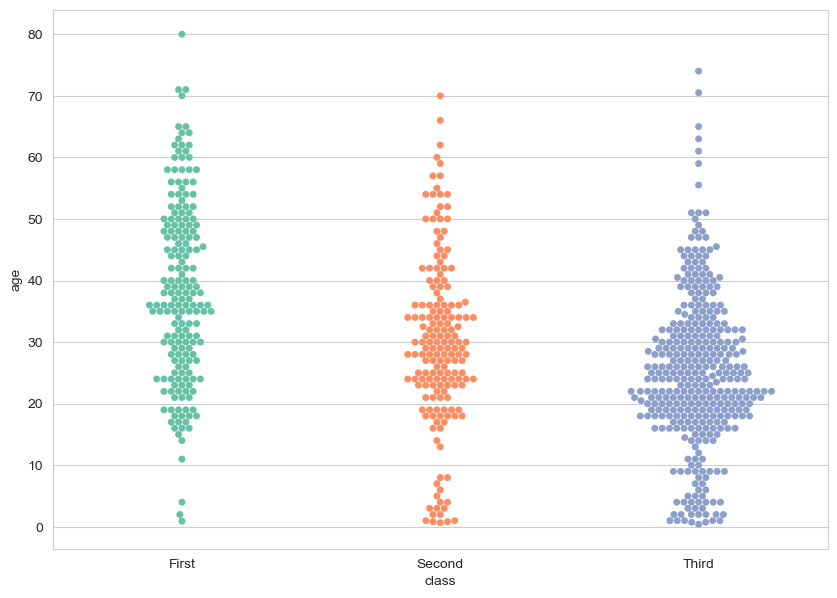

In [13]:
# Understanding a rough trend of age by class:
plt.figure(figsize=(10,7))
sns.swarmplot(x='class',y='age',data=titanic,hue='class',palette='Set2',legend=False)

In [14]:
# Imputation function to replace null age values with average values identified from box/swarm plots.
def impute_age(cols):
    Age = cols[0] # Values of the first column passed in.
    Pclass = cols[1] # Values of the srcond column passed in.
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
# Applying the imputation function across 'age' and 'pclass' columns:
titanic['age'] = titanic[['age','pclass']].apply(impute_age,axis=1)

<Axes: >

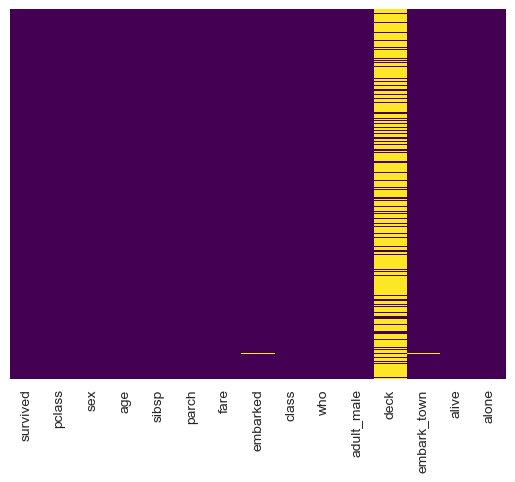

In [16]:
# Checking to make sure 'age' null values were successfully addressed:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Titanic - Correlation')

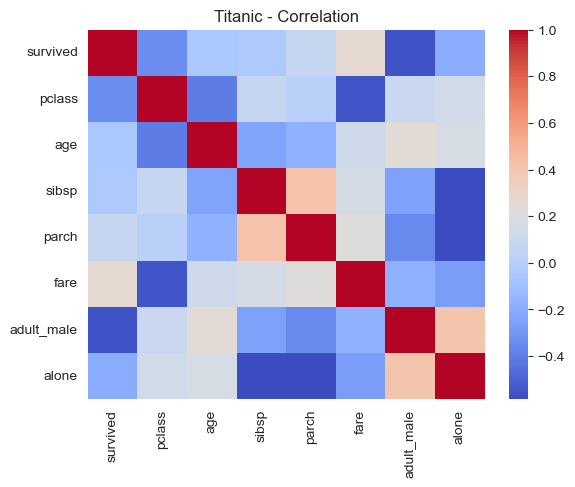

In [17]:
# Correlation of the dataset:
sns.heatmap(titanic.corr(numeric_only=True),cmap='coolwarm')
plt.title('Titanic - Correlation')

<Axes: xlabel='sex', ylabel='count'>

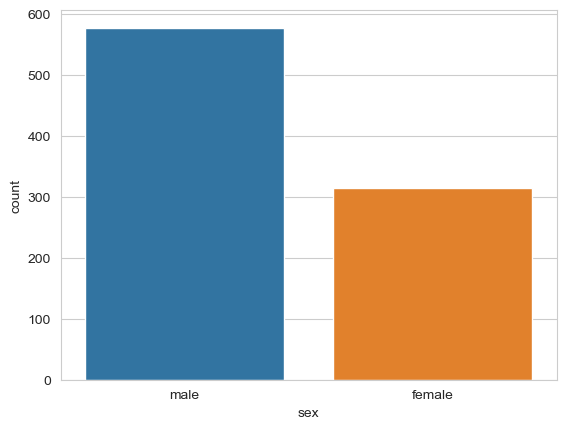

In [18]:
# Observing the difference in passenger's sex:
sns.countplot(x='sex',data=titanic)

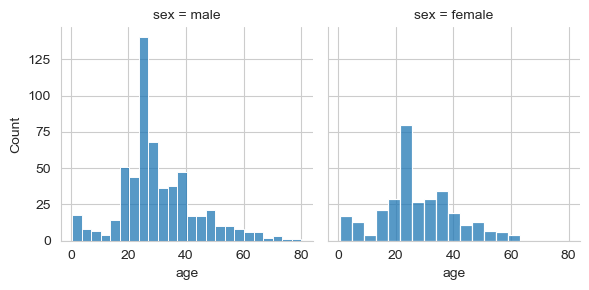

In [19]:
# Checking the age distribution, separated by sex:
tg = sns.FacetGrid(data=titanic,col='sex')
# tg.map(plt.hist, 'age')
tg.map(sns.histplot, 'age')

<Axes: xlabel='survived', ylabel='count'>

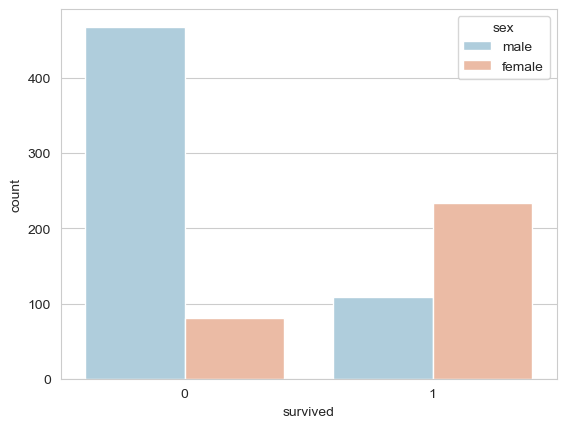

In [20]:
# Checking for a trend between passenger sex and chance of survivability:
sns.countplot(x='survived',data=titanic,hue='sex',palette='RdBu_r')

<Axes: xlabel='survived', ylabel='count'>

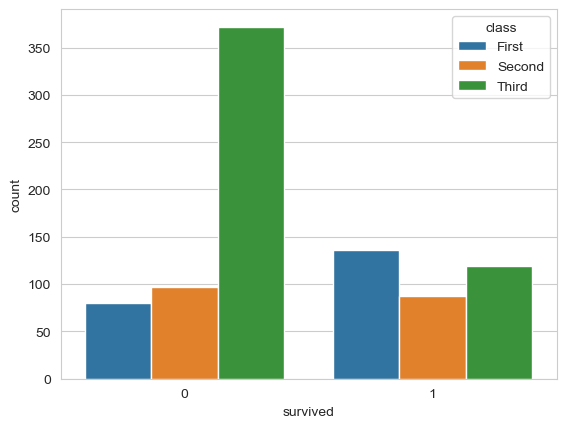

In [21]:
# Checking for a trend between passenger class and chance of survivability:
sns.countplot(x='survived',data=titanic,hue='class')

<Axes: >

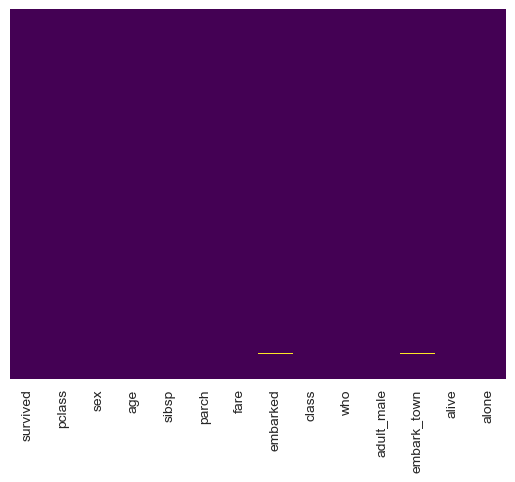

In [22]:
# Dropping the "deck" column in preparation for machine learning as there's too many missing/null data:
titanic.drop('deck',axis=1,inplace=True)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

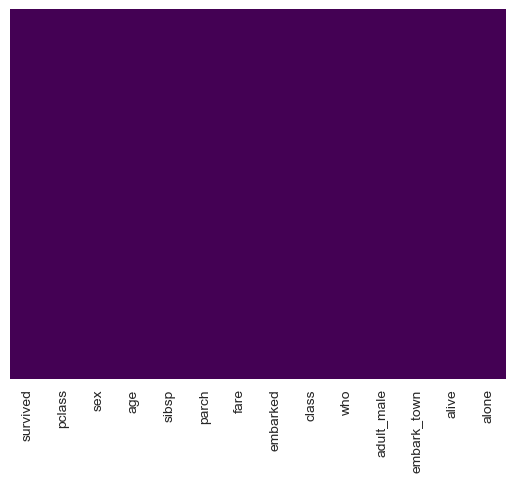

In [23]:
# Dropping the additional null values (appears to be a row) in preparation for machine learning:
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [25]:
# Creating dummy variables for categorical string values in order to perform machine learning:
print(pd.unique(titanic['sex']))
print(pd.unique(titanic['embarked']))
sex = pd.get_dummies(titanic['sex'],dtype=int,drop_first=True) # dropping the first column to avoid the columns from being perfect predictors of each other.
embark = pd.get_dummies(titanic['embarked'],dtype=int,drop_first=True)
print(sex.head())
print(embark.head())

['male' 'female']
['S' 'C' 'Q']
   male
0     1
1     0
2     0
3     0
4     1
   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [26]:
# Adding in the new dummy columns into the working data frame:
titanic = pd.concat([titanic,sex,embark],axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,1


In [27]:
# Removing and adjusting remaining columns for machine learning purpose:
# print(titanic.columns[titanic.dtypes == object])
titanic.drop(['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive'],axis=1,inplace=True)
titanic['alone'] = titanic['alone'].astype(int)

In [28]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   age       889 non-null    float64
 3   sibsp     889 non-null    int64  
 4   parch     889 non-null    int64  
 5   fare      889 non-null    float64
 6   alone     889 non-null    int32  
 7   male      889 non-null    int32  
 8   Q         889 non-null    int32  
 9   S         889 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 62.5 KB


In [30]:
# Train/test split for machine learning:
x = titanic.drop('survived',axis=1)
y = titanic['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [31]:
# Need to increase thenumber of iterations in order for the model to work with the current dataset:
logm = LogisticRegression(max_iter=300)

In [32]:
# Modeling to find probability of survivability:
logm.fit(x_train,y_train)

LogisticRegression(max_iter=300)

In [33]:
# Predict data based on the trained model:
predictions = logm.predict(x_test)

In [34]:
# Check the confusion matrix and classification report:
print(f'Confusion matrix:\n\n{confusion_matrix(y_test,predictions)}\n')
print(f'Classification report:\n\n{classification_report(y_test,predictions)}')

Confusion matrix:

[[149  14]
 [ 31  73]]

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

